# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True))


{
  "data": {
    "1": {
      "circulating_supply": 19135043,
      "id": 1,
      "last_updated": 1661731489,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 376180531071,
          "percent_change_1h": -1.34908923961104,
          "percent_change_24h": -1.96916688307093,
          "percent_change_7d": -9.08271376257944,
          "percentage_change_1h": -1.34908923961104,
          "percentage_change_24h": -1.96916688307093,
          "percentage_change_7d": -9.08271376257944,
          "price": 19652.46,
          "volume_24h": 19939787559
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19135043,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1661731489
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True))


{
  "data": {
    "1027": {
      "circulating_supply": 120291415,
      "id": 1027,
      "last_updated": 1661731499,
      "max_supply": 120291415,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 172708828070,
          "percent_change_1h": -2.03044332016026,
          "percent_change_24h": -3.79563287575751,
          "percent_change_7d": -11.6472198749137,
          "percentage_change_1h": -2.03044332016026,
          "percentage_change_24h": -3.79563287575751,
          "percentage_change_7d": -11.6472198749137,
          "price": 1434.98,
          "volume_24h": 10557060620
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 120291415,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1661731499
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [89]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of BTC is ${btc_price}")


The current price of BTC is $19652.46


In [90]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of ETH is ${eth_price}")


The current price of ETH is $1434.98


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [91]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your holding in BTC is ${btc_value:.2f}")


The current value of your holding in BTC is $23582.95


In [92]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of your holding in ETH is ${eth_value:.2f}")


The current value of your holding in ETH is $7605.39


In [93]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f" The current cryptocurrency wallet balance is ${total_crypto_wallet:.2f}")


 The current cryptocurrency wallet balance is $31188.35


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

#check keys imported correctly by looking at type
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [17]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe="1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [18]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end= end_date
).df

# Reorganize the DataFrame
SPY = prices_df[prices_df["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = prices_df[prices_df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.29  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [94]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price for AGG is ${agg_close_price}")


The closing price for AGG is $119.43


In [95]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"The closing price for SPY is ${spy_close_price}")


The closing price for SPY is $334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [100]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The value of AGG in your portfolio is ${agg_value:.2f}")


The value of AGG in your portfolio is $23886.00


In [99]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The value of SPY in your portfolio is ${spy_value:.2f}")


The value of SPY in your portfolio is $36802.70


In [98]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is: ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the portfolio is: $60688.70


In [101]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current portfolio balance
print(f"The current portfolio balance is: ${total_portfolio:.2f}")


The current portfolio balance is: $91877.05


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [88]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[31188.345999999998, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [44]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns=["amount"],
    index=["crypto", "stocks_and_bonds"]
)

# Display the savings_df DataFrame
savings_df


,amount
crypto,31188.346
stocks_and_bonds,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio allocation'}, ylabel='amount'>

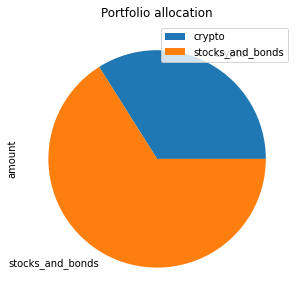

In [102]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount", title="Portfolio allocation", figsize=(10,5))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [85]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [86]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congrats, your portfolio balance of ${total_portfolio:.2f} has more than enough money to fund your emergency fund")
elif total_portfolio == emergency_fund_value:
    print(f"Congrats, your portfolio balance equals your emergency fund requirement of ${emergency_fund_value:.2f}")
else:
    print(f"your portfolio balance of {total_portfolio} is insufficient to fund your emergency fund by ${(emergency_fund_value - total_portfolio):.2f}")


Congrats, your portfolio balance of $91877.05 has more than enough money to fund your emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [62]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-08-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-28", tz="America/New_York").isoformat()

In [63]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
financial_planner_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = financial_planner_df[financial_planner_df["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = financial_planner_df[financial_planner_df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
financial_planner_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display(financial_planner_df.head())
display(financial_planner_df.tail())


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-08-28 04:00:00+00:00  286.10  289.0700  285.25  288.89  60200590   
2019-08-29 04:00:00+00:00  291.77  293.1600  290.61  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.42  292.45  63024780   
2019-09-03 04:00:00+00:00  290.56  291.5800  289.27  290.74  69233875   
2019-09-04 04:00:00+00:00  293.15  294.0550  292.31  294.04  47160461   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-08-28 04:00:00+00:00      311534  287.877722  114.30  114.3000  114.040   
2019-08-29 04:00:00+00:00      309986  292.211021  114.08  114.0800  113.835   
2019-08-30 04:00:00+00:00      303476  292.713824  113.90  114.1500  113.890   
2019-09-03 04:00:00+00:00      362212  290.492676  113.84  114.1200  113.690   
2019-09-04 04:00:00+00:00      236850  293.322384  113.82  114.0801  113.820   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-08-28 04:00:00+00:00  114.10  5102472       15819  114.130072  
2019-08-29 04:00:00+00:00  114.03  2670969       11548  113.955831  
2019-08-30 04:00:00+00:00  114.13  4661629       11279  114.025187  
2019-09-03 04:00:00+00:00  113.84  6197557       24789  113.939811  
2019-09-04 04:00:00+00:00  114.04  3814413       15256  114.008878

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-08-22 04:00:00+00:00  417.04  417.2300  412.40  413.35   77604197   
2022-08-23 04:00:00+00:00  412.96  415.4200  411.77  412.35   48952606   
2022-08-24 04:00:00+00:00  412.10  415.1101  411.39  413.67   48983049   
2022-08-25 04:00:00+00:00  415.27  419.5600  414.09  419.51   48816114   
2022-08-26 04:00:00+00:00  419.46  419.9600  405.25  405.31  102743389   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-08-22 04:00:00+00:00      484052  415.048519  101.82  101.8900  101.5150   
2022-08-23 04:00:00+00:00      389397  413.095826  101.54  101.9671  101.4000   
2022-08-24 04:00:00+00:00      334281  413.383226  101.35  101.3950  101.1500   
2022-08-25 04:00:00+00:00      338000  416.816182  101.33  101.8700  101.2426   
2022-08-26 04:00:00+00:00      669874  410.796242  101.67  101.8500  101.4200   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-22 04:00:00+00:00  101.55  7132742       24710  101.702316  
2022-08-23 04:00:00+00:00  101.51  6531916       21473  101.686417  
2022-08-24 04:00:00+00:00  101.24  5397673       19881  101.259133  
2022-08-25 04:00:00+00:00  101.80  8184169       22707  101.529620  
2022-08-26 04:00:00+00:00  101.61  4402402       19101  101.647650

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [69]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
num_sims = 500
num_years = 30

MC_thirty_years = MCSimulation(
    portfolio_data = financial_planner_df,
    weights = [.60, .40],
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)
    
# Review the simulation input data
MC_thirty_years.portfolio_data.head()


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-08-28 04:00:00+00:00  286.10  289.0700  285.25  288.89  60200590   
2019-08-29 04:00:00+00:00  291.77  293.1600  290.61  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.42  292.45  63024780   
2019-09-03 04:00:00+00:00  290.56  291.5800  289.27  290.74  69233875   
2019-09-04 04:00:00+00:00  293.15  294.0550  292.31  294.04  47160461   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-28 04:00:00+00:00      311534  287.877722          NaN  114.30   
2019-08-29 04:00:00+00:00      309986  292.211021     0.012773  114.08   
2019-08-30 04:00:00+00:00      303476  292.713824    -0.000444  113.90   
2019-09-03 04:00:00+00:00      362212  290.492676    -0.005847  113.84   
2019-09-04 04:00:00+00:00      236850  293.322384     0.011350  113.82   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-08-28 04:00:00+00:00  114.3000  114.040  114.10  5102472       15819   
2019-08-29 04:00:00+00:00  114.0800  113.835  114.03  2670969       11548   
2019-08-30 04:00:00+00:00  114.1500  113.890  114.13  4661629       11279   
2019-09-03 04:00:00+00:00  114.1200  113.690  113.84  6197557       24789   
2019-09-04 04:00:00+00:00  114.0801  113.820  114.04  3814413       15256   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-28 04:00:00+00:00  114.130072          NaN  
2019-08-29 04:00:00+00:00  113.955831    -0.000613  
2019-08-30 04:00:00+00:00  114.025187     0.000877  
2019-09-03 04:00:00+00:00  113.939811    -0.002541  
2019-09-04 04:00:00+00:00  114.008878     0.001757

In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()


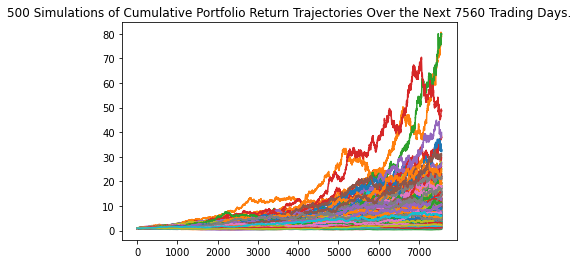

In [73]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_years_line_plot = MC_thirty_years.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

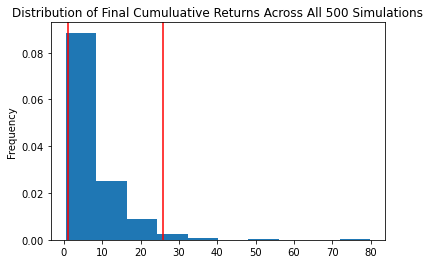

In [76]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_years_distribution_plot = MC_thirty_years.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [77]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_table = MC_thirty_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_table)

count           500.000000
mean              7.876269
std               7.873008
min               0.534979
25%               3.238916
50%               5.533774
75%               9.721084
max              79.808174
95% CI Lower      1.203733
95% CI Upper     25.770236
Name: 7560, dtype: float64


C:\Users\cuong\Desktop\FinTech-Workspace\Python_Project\Challenges\Module_5_Challenge\financial_planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [80]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is: ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the members portfolio is: $60688.70


In [105]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_table[8]*total_portfolio,2)
ci_upper_thirty_cumulative_return = round(MC_table[9]*total_portfolio,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the portfolio"
      f" with an 60/40 weight portfolio over the next {num_years} years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $91877.05 in the portfolio with an 60/40 weight portfolio over the next 30 years will end within in the range of $110595.39 and $2367693.11.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [106]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
num_sims_10_year = 500
num_years_10 = 10

MC_ten_years = MCSimulation(
    portfolio_data = financial_planner_df,
    weights=[.80,.20],
    num_simulation = num_sims_10_year,
    num_trading_days = 252 * num_years_10
)

# Review the simulation input data
MC_ten_years.portfolio_data.head()


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-08-28 04:00:00+00:00  286.10  289.0700  285.25  288.89  60200590   
2019-08-29 04:00:00+00:00  291.77  293.1600  290.61  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.42  292.45  63024780   
2019-09-03 04:00:00+00:00  290.56  291.5800  289.27  290.74  69233875   
2019-09-04 04:00:00+00:00  293.15  294.0550  292.31  294.04  47160461   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-28 04:00:00+00:00      311534  287.877722          NaN  114.30   
2019-08-29 04:00:00+00:00      309986  292.211021     0.012773  114.08   
2019-08-30 04:00:00+00:00      303476  292.713824    -0.000444  113.90   
2019-09-03 04:00:00+00:00      362212  290.492676    -0.005847  113.84   
2019-09-04 04:00:00+00:00      236850  293.322384     0.011350  113.82   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-08-28 04:00:00+00:00  114.3000  114.040  114.10  5102472       15819   
2019-08-29 04:00:00+00:00  114.0800  113.835  114.03  2670969       11548   
2019-08-30 04:00:00+00:00  114.1500  113.890  114.13  4661629       11279   
2019-09-03 04:00:00+00:00  114.1200  113.690  113.84  6197557       24789   
2019-09-04 04:00:00+00:00  114.0801  113.820  114.04  3814413       15256   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-28 04:00:00+00:00  114.130072          NaN  
2019-08-29 04:00:00+00:00  113.955831    -0.000613  
2019-08-30 04:00:00+00:00  114.025187     0.000877  
2019-09-03 04:00:00+00:00  113.939811    -0.002541  
2019-09-04 04:00:00+00:00  114.008878     0.001757

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()


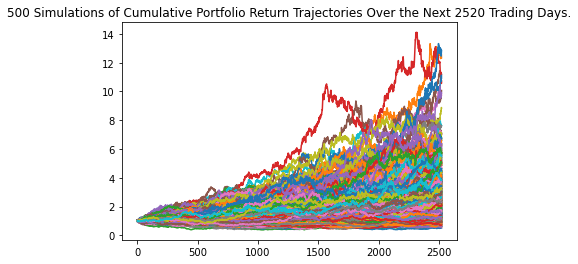

In [109]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_years_line_plot = MC_ten_years.plot_simulation()


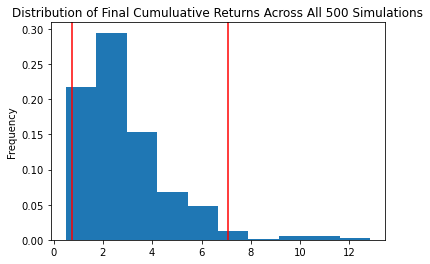

In [110]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_years_dist_plot = MC_ten_years.plot_distribution()


In [111]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_years_table = MC_ten_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_ten_years_table)

count           500.000000
mean              2.897398
std               1.830546
min               0.494137
25%               1.632925
50%               2.428469
75%               3.681316
max              12.840727
95% CI Lower      0.727650
95% CI Upper      7.067315
Name: 2520, dtype: float64


C:\Users\cuong\Desktop\FinTech-Workspace\Python_Project\Challenges\Module_5_Challenge\financial_planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [112]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"the current balance of the stock and bond portion of the members portfolio is ${total_stocks_bonds:.2f}")


the current balance of the stock and bond portion of the members portfolio is $60688.70


In [113]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_ten_years_table[8]*total_portfolio,2)
ci_upper_ten_cumulative_return = round(MC_ten_years_table[9]*total_portfolio,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the portfolio"
      f" with an 80/20 weight portfolio over the next {num_years_10} years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that an initial investment of $91877.05 in the portfolio with an 80/20 weight portfolio over the next 10 years will end within in the range of $66854.36 and $649324.0.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?